## THE SPARKS FOUNDATION TASK (GRIP)

### Data Science And Business Analytics (Intern) (GRIP OCTOBER - 2022)

### TASK 1: Prediction Using Supervised ML

### Author: Vishal Jamdhade

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#matplotlib inline

### Reading the data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#shape of data i.e rows and columns 

data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

#it will give total no. of Columns and their non null count with data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Check the null values in data

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Plotting the distribution of scores

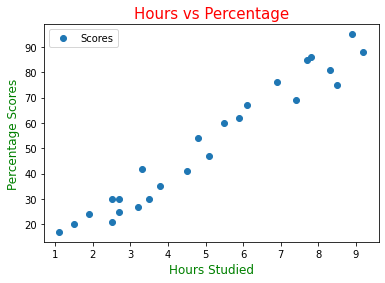

In [7]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage',color='red',size=15)
plt.xlabel('Hours Studied',color='green',size=12)
plt.ylabel('Percentage Scores',color='green',size=12)
plt.show()

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
hours = data['Hours']
scores = data['Scores']

In [10]:
import seaborn as sns

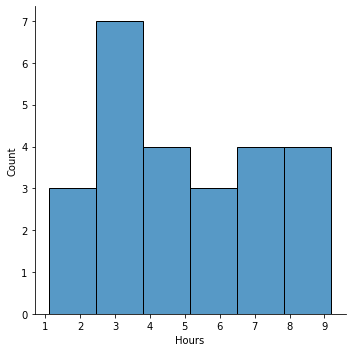

In [11]:
sns.displot(hours)

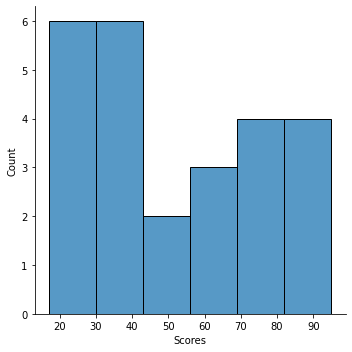

In [12]:
sns.displot(scores)

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

### Splittng the data

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Fitting Model

In [24]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

### Plotting the regression line

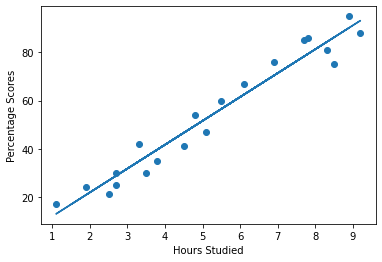

In [16]:
line=regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X_train,y_train)
plt.plot(X,line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

### To predict the percentage of marks

In [17]:
print(X_test)     # Testing data - In Hours
y_pred = regressor.predict(X_test)      # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing Actual vs Predicted Marks

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visualization of actual and predicted values

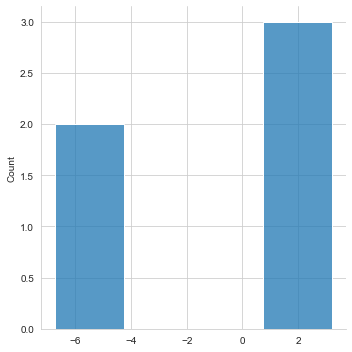

In [19]:
sns.set_style('whitegrid')
sns.displot(np.array(y_test-y_pred))
plt.show()

### What should be the predict score if student studies for the 9.25 hrs/day

In [20]:
h = 9.25
s = regressor.predict([[h]])
print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(s[0]))
print("If a student studies for {} hours per day then he or she will score {} % in exam".format(h,s))

No of Hours = 9.25
Predicted Score = 93.69173248737535
If a student studies for 9.25 hours per day then he or she will score [93.69173249] % in exam


### To Evaluating the model

In [21]:
from sklearn import metrics 
print('mean absolute error = ',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error = ',metrics.mean_squared_error(y_test,y_pred))
print(' root mean squared error = ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

mean absolute error =  4.183859899002975
mean squared error =  21.598769307217406
 root mean squared error =  2.0454485813637495
